## Data from World Happiness Report

The World Happiness Report is an annual publication of the United Nations Sustainable Development Solutions Network. It contains articles, and rankings of national happiness based on respondent ratings of their own lives, which the report also correlates with various life factors.

In this notebook we will explore the happiness of different countries and the features associated.
The datasets that we will use are available in *Data*: **happiness2020.pkl** and **countries_info.csv**.

Although the features are self-explanatory, here a summary: 

**happiness2020.pkl**
* country: *Name of the country*
* happiness_score: *Happiness score*
* social_support: *Social support (mitigation the effects of inequality)*
* healthy_life_expectancy: *Healthy Life Expectancy*
* freedom_of_choices: *Freedom to make life choices*
* generosity: *Generosity (charity, volunteers)*
* perception_of_corruption: *Corruption Perception*
* world_region: *Area of the world of the country*

**countries_info.csv**
* country_name: *Name of the country*
* area: *Area in sq mi*
* population: *Number of people*
* literacy: *Literacy percentage*

In [1]:
import pandas as pd
%matplotlib inline

DATA_FOLDER = 'Data/'

HAPPINESS_DATASET = DATA_FOLDER+"happiness2020.csv"
COUNTRIES_DATASET = DATA_FOLDER+"countries_info.csv"

## Task 1: Load the data

Load the 2 datasets in Pandas dataframes (called *happiness* and *countries*), and show the first rows.


**Hint**: Use the correct reader and verify the data has the expected format.

In [2]:
happiness = pd.read_csv(HAPPINESS_DATASET)
happiness.columns = happiness.columns.str.capitalize()
happiness.head(5)

,Country,Happiness_score,Social_support,Healthy_life_expectancy,Freedom_of_choices,Generosity,Perception_of_corruption,World_region
0,Afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia
1,Albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe
2,Algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa
3,Argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean
4,Armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States


In [3]:
countries = pd.read_csv(COUNTRIES_DATASET, decimal=',')
countries.columns = countries.columns.str.capitalize()
countries.head(5)

,Country_name,Area,Population,Literacy
0,afghanistan,647500,31056997,36.0
1,albania,28748,3581655,86.5
2,algeria,2381740,32930091,70.0
3,argentina,2766890,39921833,97.1
4,armenia,29800,2976372,98.6


## Task 2: Let's merge the data

Create a dataframe called *country_features* by merging *happiness* and *countries*. A row of this dataframe must describe all the features that we have about a country.

**Hint**: Verify that all the rows are in the final dataframe.

In [4]:
country_features = pd.merge(happiness, countries , left_index=True, right_index=True, how='outer')\
                     .drop("Country_name", axis=1)\
                     .set_index('Country')            
country_features.sample(5)

,Happiness_score,Social_support,Healthy_life_expectancy,Freedom_of_choices,Generosity,Perception_of_corruption,World_region,Area,Population,Literacy
Country,,,,,,,,,,
Portugal,5.9109,0.886591,72.402023,0.888748,-0.220714,0.892630,Western Europe,92391,10605870,93.3
Rwanda,3.3123,0.540835,61.098846,0.900589,0.055484,0.183541,Sub-Saharan Africa,26338,8648248,70.4
Kenya,4.5830,0.702652,60.096931,0.829748,0.294682,0.831499,Sub-Saharan Africa,582650,34707817,85.1
Albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe,28748,3581655,86.5
Burkina Faso,4.7687,0.712944,53.889454,0.665564,-0.019081,0.739795,Sub-Saharan Africa,274200,13902972,26.6


## Task 3: Where are people happier?

Print the top 10 countries based on their happiness score (higher is better).

In [5]:
country_features.sort_values(by='Happiness_score', ascending=False)[['Happiness_score']].head(10)

,Happiness_score
Country,
Finland,7.8087
Denmark,7.6456
Switzerland,7.5599
Iceland,7.5045
Norway,7.4880
Netherlands,7.4489
Sweden,7.3535
New Zealand,7.2996
Austria,7.2942


We are interested to know in what world region people are happier. 

Create and print a dataframe with the (1) average happiness score and (2) the number of countries for each world region.
Sort the result to show the happiness ranking.

In [6]:
world_region = country_features.groupby('World_region').size()
world_region

World_region
Central and Eastern Europe            14
Commonwealth of Independent States    12
East Asia                              3
Latin America and Caribbean           20
Middle East and North Africa          16
North America and ANZ                  4
South Asia                             6
Southeast Asia                         8
Sub-Saharan Africa                    32
Western Europe                        20
dtype: int64

In [7]:
world_region = country_features.groupby('World_region')\
                               .mean()[['Happiness_score']]
                               
world_region['Number_of_countries'] = country_features.groupby('World_region')\
                                                      .size()
                                                      
world_region = world_region.sort_values(by='Happiness_score',ascending=False)
world_region

,Happiness_score,Number_of_countries
World_region,,
North America and ANZ,7.173525,4
Western Europe,6.967405,20
Latin America and Caribbean,5.971280,20
Central and Eastern Europe,5.891393,14
Southeast Asia,5.517788,8
East Asia,5.483633,3
Commonwealth of Independent States,5.358342,12
Middle East and North Africa,5.269306,16
Sub-Saharan Africa,4.393856,32


The first region has only a few countries! What are them and what is their score?

In [8]:
country_features.loc[country_features['World_region'] == world_region.index[0]][['Happiness_score']]

,Happiness_score
Country,
Australia,7.2228
Canada,7.2321
New Zealand,7.2996
United States,6.9396


## Task 4: How literate is the world?

Print the names of the countries with a level of literacy of 100%. 

For each country, print the name and the world region in the format: *{region name} - {country name} ({happiness score})*

In [9]:
best_literacy = country_features.loc[country_features['Literacy'] == 100][['Literacy', 'World_region', 'Happiness_score']]
for i in range(len(best_literacy.index)):
    print(f"{best_literacy['World_region'][i]} - {best_literacy.index[i]} ({best_literacy['Happiness_score'][i]})")

North America and ANZ - Australia (7.222799778)
Western Europe - Denmark (7.645599842)
Western Europe - Finland (7.808700085)
Western Europe - Luxembourg (7.237500191)
Western Europe - Norway (7.487999916000001)


What is the global average?

In [10]:
print(f"Literacy average: {round(country_features['Literacy'].mean(), 2)}%")

Literacy average: 81.85%


Calculate the proportion of countries with a literacy level below 50%. Print the value in percentage, formatted with 2 decimals.

In [11]:
worst_literacy = country_features.loc[country_features['Literacy'] < 50]
nb_bad_literacy = len(worst_literacy)
nb_countries = len(country_features)
propor_worst = nb_bad_literacy/nb_countries*100

print(f"Percentage of countries with literacy level < 50%: {round(propor_worst,2)}%")

Percentage of countries with literacy level < 50%: 11.85%


Print the raw number and the percentage of world population that is illiterate.

In [16]:
country_features['Illeterate'] = country_features['Population']*((100-country_features['Literacy'])/100)
sum_illeterate = country_features['Illeterate'].sum()
total_pop = country_features['Population'].sum()

print(f"Number of illeterate people: {round(sum_illeterate)}")
print(f"Proportion of illeterate people: {round(sum_illeterate/total_pop*100, 2)}%")

Number of illeterate people: 1249372988
Proportion of illeterate people: 20.33%


## Task 5: Population density

Add to the dataframe a new field called *population_density* computed by dividing *population* by *area*.

In [18]:
country_features['Population_density'] = country_features['Population']/country_features['Area']
country_features.sample(5)

,Happiness_score,Social_support,Healthy_life_expectancy,Freedom_of_choices,Generosity,Perception_of_corruption,World_region,Area,Population,Literacy,Illeterate,Population_density
Country,,,,,,,,,,,,
United Arab Emirates,6.7908,0.849181,67.082787,0.941346,0.123451,0.594502,Middle East and North Africa,82880,2602713,77.9,575199.573,31.403390
Croatia,5.5047,0.874624,70.214905,0.714839,-0.128538,0.916495,Central and Eastern Europe,56542,4494749,98.5,67421.235,79.493987
Malaysia,5.3843,0.816509,67.102158,0.894627,0.114727,0.839302,Southeast Asia,329750,24385858,88.7,2755601.954,73.952564
Panama,6.3048,0.902094,69.603012,0.880367,-0.153928,0.851589,Latin America and Caribbean,78200,3191319,92.6,236157.606,40.809706
Portugal,5.9109,0.886591,72.402023,0.888748,-0.220714,0.892630,Western Europe,92391,10605870,93.3,710593.290,114.793324


What is the happiness score of the 3 countries with the lowest population density?

In [20]:
country_features.sort_values(by='Population_density', ascending=True)[['Happiness_score']].head(3)

,Happiness_score
Country,
Mongolia,5.4562
Australia,7.2228
Botswana,3.4789


## Task 6: Healty and happy?

Plot in a scatter plot the happiness score (x) and healty life expectancy (y).

<AxesSubplot: xlabel='Happiness_score', ylabel='Healthy_life_expectancy'>

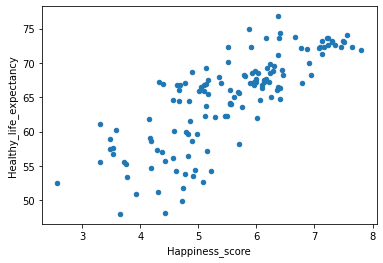

In [26]:
country_features.plot(kind='scatter', x='Happiness_score', y='Healthy_life_expectancy')

Feel free to continue the exploration of the dataset! We'll release the solutions next week.

----
Enjoy EPFL and be happy, next year Switzerland must be #1.